<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-machine-learning-2023/blob/main/Lailatul_Badriyah_UTS_Clustering_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kelompok 1**
Nama: Lailatul Badriyah

Kelas: TI-3H

Absen: 14

NIM: 2141720036



---



# Segmentasi Gambar dengan Clustering

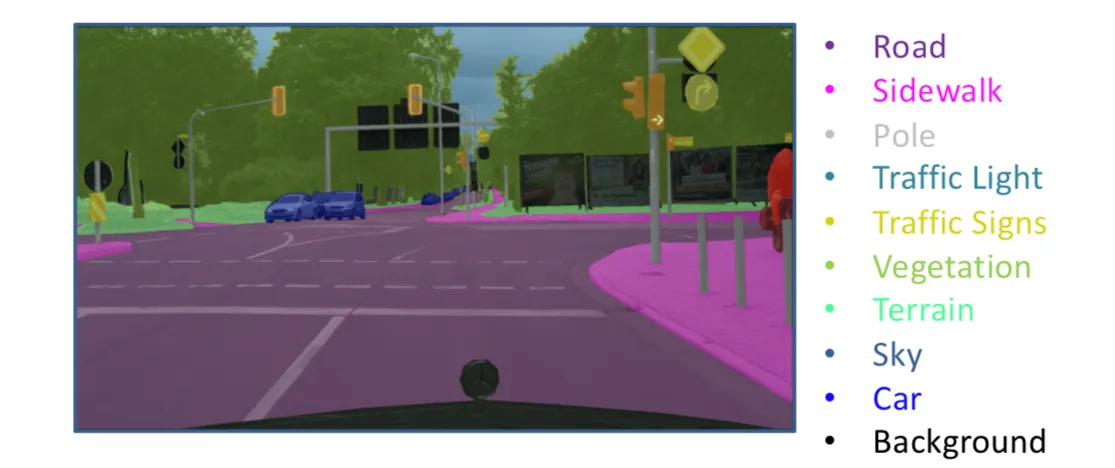

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

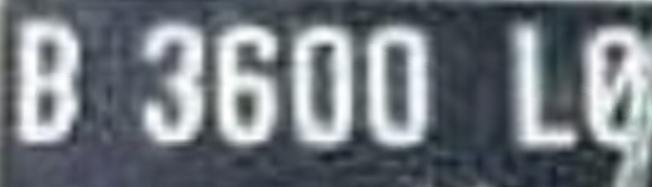

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

### **1. Import Library**

In [95]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

### **2. Menghubungkan dengan Google Drive**

In [96]:
# Mount Google Drive agar dapat mengakses dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **3. Mengambil Citra dari Dataset**

In [97]:
dataset = '/content/drive/MyDrive/MACHINE-LEARNING/'
selected_images = [os.path.join(dataset, file) for file in os.listdir(dataset)]
five_plat = selected_images[:5]

### **4. Menampilkan 5 Citra Sebelum Segmentasi**

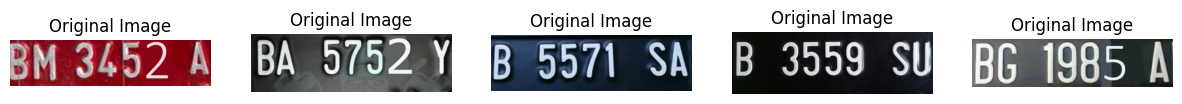

In [98]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in five_plat]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for ax, image in zip(axes, original_images):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title('Original Image')
    ax.axis('off')
plt.show()

## **Plat 1**

### **1. Load Citra ke-1**

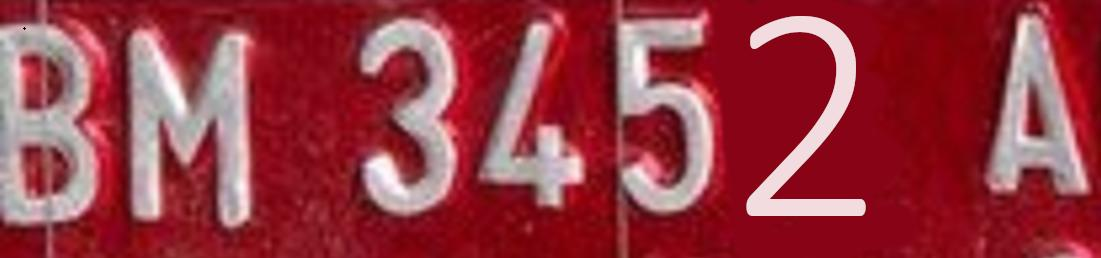

In [139]:
# Muat satu citra tertentu dan tampilkan dengan cv2_imshow
img1 = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/BM3452A.jpg')
cv2_imshow(img1)

### **2. Menampilkan Tinggi, Lebar, dan Jumlah Channel Citra**

In [140]:
# Dapatkan tinggi (h), lebar (w), dan jumlah channel (ch) citra
h, w, ch = img1.shape
print("Tinggi:", h)
print("Lebar:", w)
print("Channel:", ch)

Tinggi: 258
Lebar: 1101
Channel: 3


### **3. Normalisasi Citra**

In [141]:
# Normalisasi data citra ke rentang 0-1
data = img1 / 255.0
# Reshape data citra ke bentuk 2D
data = data.reshape(h * w, ch)
data.shape

(284058, 3)

### **4. Plot Ruang Warna RGB**

In [142]:
# Fungsi untuk memplot piksel-piksel citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

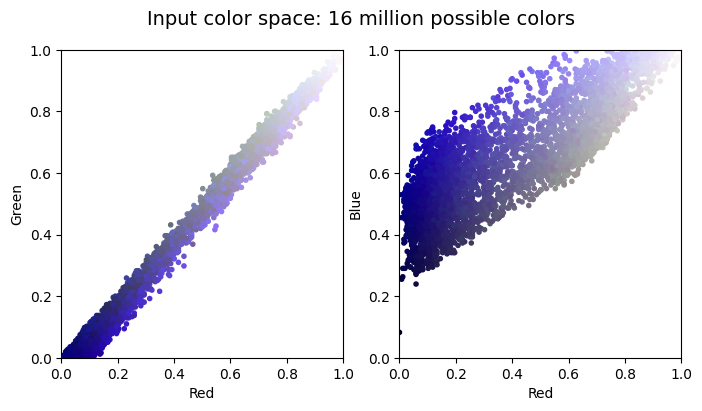

In [143]:
# Memplot distribusi piksel citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

### **5. Segmentasi Citra Menggunakan Algoritma K-Means**

In [144]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img1.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=jumlah_klaster)

# Fit model K-Means ke data citra yang sudah direshape
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img1.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img1.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 255]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **6. Hasil Segmentasi Citra**

Text(0.5, 1.0, '2-color Image')

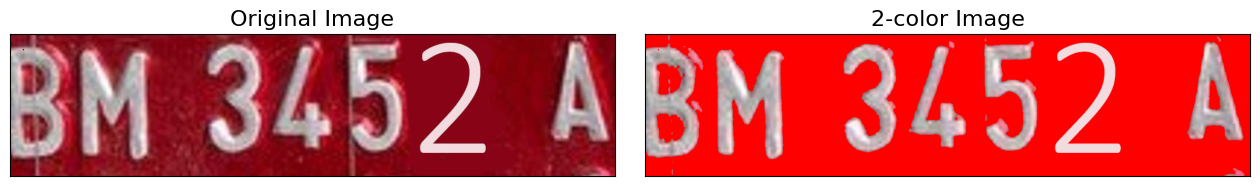

In [145]:
# Memplot citra asli dan citra hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

### **7. Konversi Label Klaster ke Citra Biner**

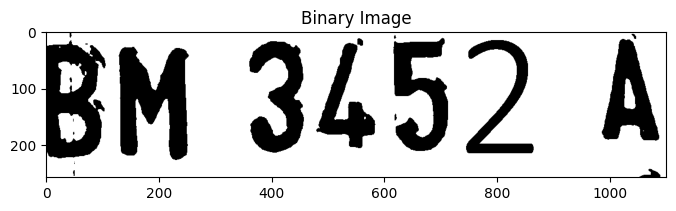

In [146]:
# Membuat citra biner
threshold = 0  # Sesuaikan ambang batas sesuai kebutuhan

binary_image = label_klaster.copy()  # Salin label klaster ke citra biner
binary_image[label_klaster != 0] = 0  # Setel semua label selain yang diinginkan menjadi 0 (hitam)
binary_image[label_klaster == 0] = 255  # Setel label yang diinginkan menjadi 255 (putih)

# Menampilkan citra biner
plt.figure(figsize=(8, 4))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

## **Image 2**

### **1. Load Citra ke-2**

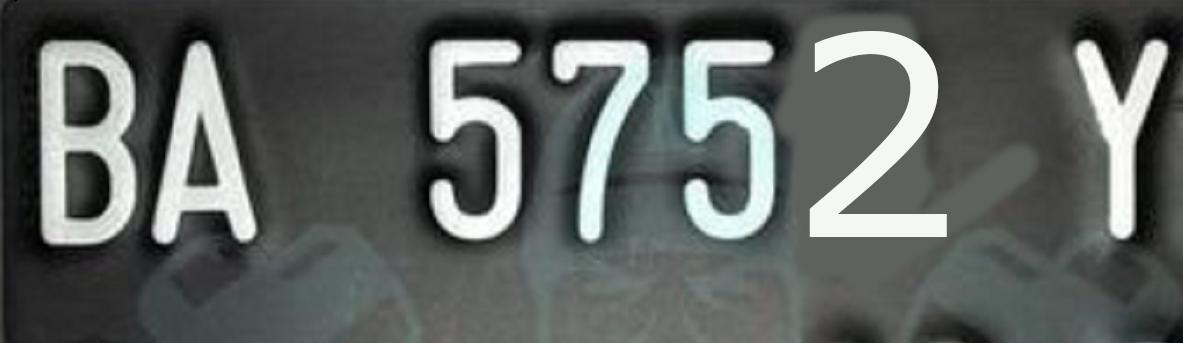

In [147]:
# Muat satu citra tertentu dan tampilkan dengan cv2_imshow
img2 = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/BA5752Y.jpg')
cv2_imshow(img2)

### **2. Menampilkan Tinggi, Lebar, dan Jumlah Channel Citra**

In [148]:
# Dapatkan tinggi (h), lebar (w), dan jumlah channel (ch) citra
h, w, ch = img2.shape
print("Tinggi:", h)
print("Lebar:", w)
print("Channel:", ch)

Tinggi: 343
Lebar: 1183
Channel: 3


### **3. Normalisasi Citra**

In [149]:
# Normalisasi data citra ke rentang 0-1
data = img2 / 255.0
# Reshape data citra ke bentuk 2D
data = data.reshape(h * w, ch)
data.shape

(405769, 3)

### **4. Plot Ruang Warna RGB**

In [150]:
# Fungsi untuk memplot piksel-piksel citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

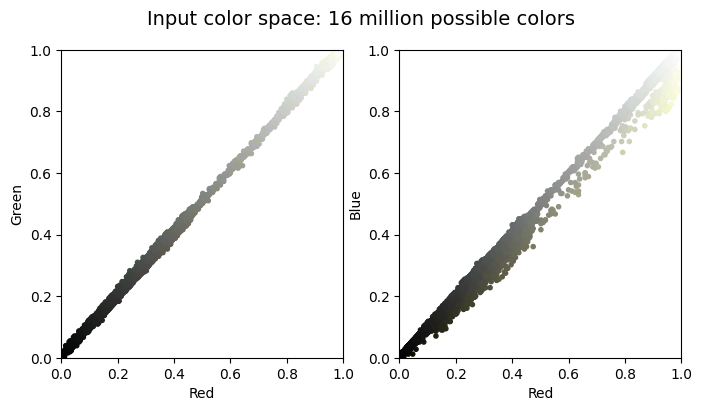

In [151]:
# Memplot distribusi piksel citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

### **5. Segmentasi Citra Menggunakan Algoritma K-Means**

In [155]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img2.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=jumlah_klaster)

# Fit model K-Means ke data citra yang sudah direshape
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img2.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img2.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **6. Hasil Segmentasi Citra**

Text(0.5, 1.0, '2-color Image')

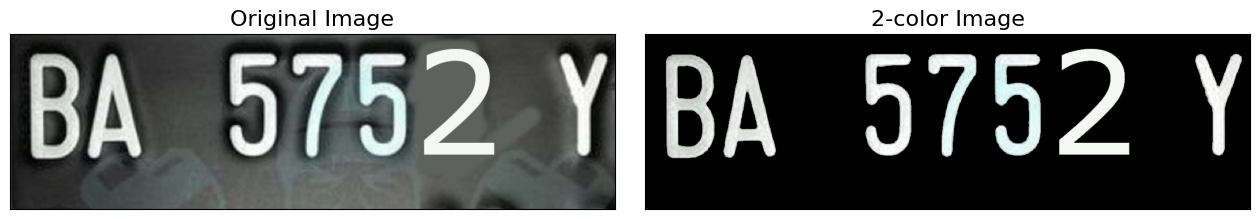

In [156]:
# Memplot citra asli dan citra hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

### **7. Konversi Label Klaster ke Citra Biner**

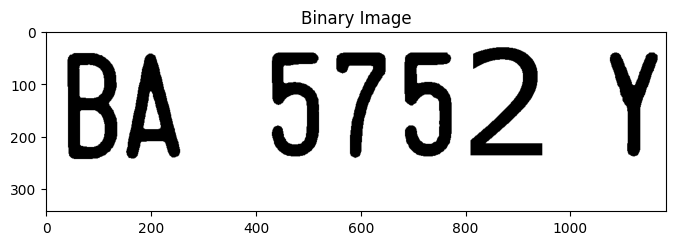

In [157]:
# Membuat citra biner
threshold = 0  # Sesuaikan ambang batas sesuai kebutuhan

binary_image = label_klaster.copy()  # Salin label klaster ke citra biner
binary_image[label_klaster != 0] = 0  # Setel semua label selain yang diinginkan menjadi 0 (hitam)
binary_image[label_klaster == 0] = 255  # Setel label yang diinginkan menjadi 255 (putih)

# Menampilkan citra biner
plt.figure(figsize=(8, 4))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

## **Image 3**

### **1. Load Citra ke-3**

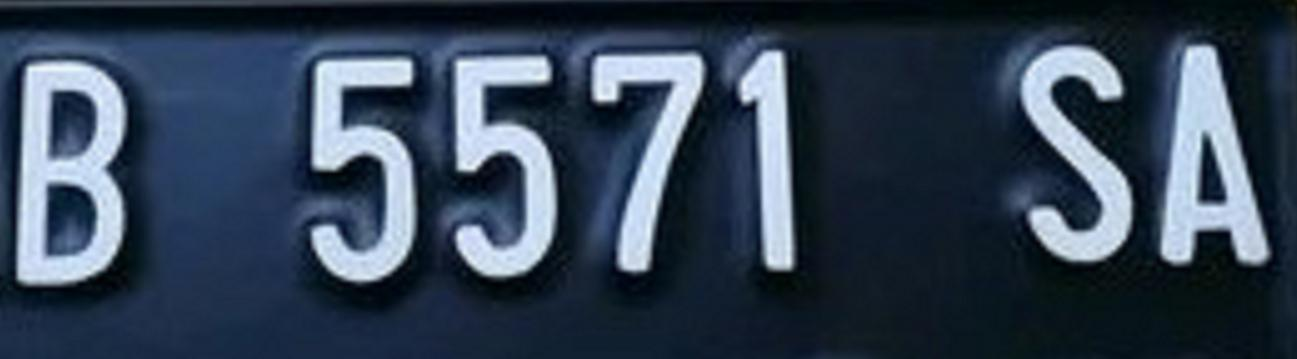

In [158]:
# Muat satu citra tertentu dan tampilkan dengan cv2_imshow
img3 = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/B5571SA.jpg')
cv2_imshow(img3)

### **2. Menampilkan Tinggi, Lebar, dan Jumlah Channel Citra**

In [159]:
# Dapatkan tinggi (h), lebar (w), dan jumlah channel (ch) citra
h, w, ch = img3.shape
print("Tinggi:", h)
print("Lebar:", w)
print("Channel:", ch)

Tinggi: 359
Lebar: 1297
Channel: 3


### **3. Normalisasi Citra**

In [160]:
# Normalisasi data citra ke rentang 0-1
data = img3 / 255.0
# Reshape data citra ke bentuk 2D
data = data.reshape(h * w, ch)
data.shape

(465623, 3)

### **4. Plot Ruang Warna RGB**

In [161]:
# Fungsi untuk memplot piksel-piksel citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

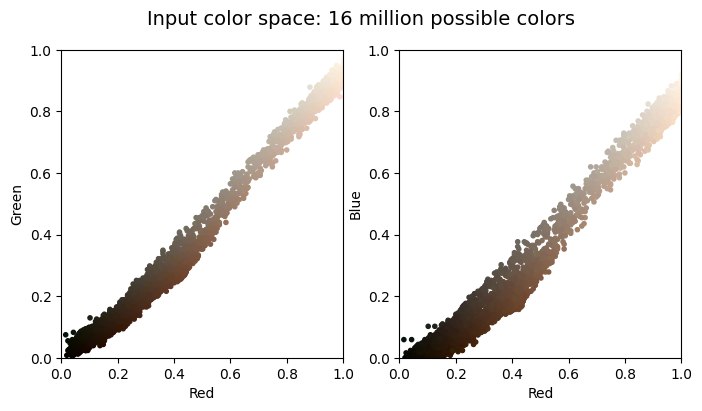

In [162]:
# Memplot distribusi piksel citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

### **5. Segmentasi Citra Menggunakan Algoritma K-Means**

In [163]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img3.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=jumlah_klaster)

# Fit model K-Means ke data citra yang sudah direshape
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img3.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img3.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **6. Hasil Segmentasi Citra**

Text(0.5, 1.0, '2-color Image')

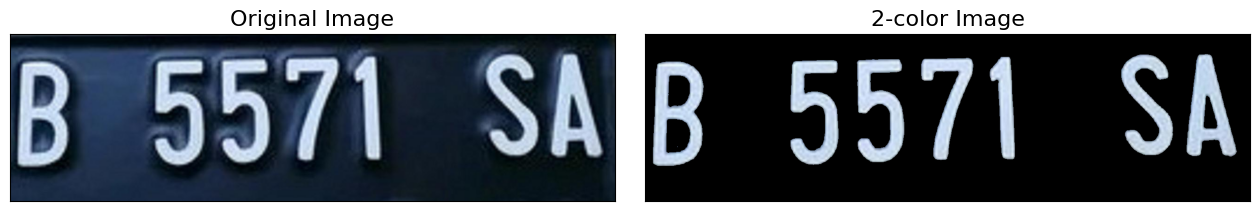

In [164]:
# Memplot citra asli dan citra hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

### **7. Konversi Label Klaster ke Citra Biner**

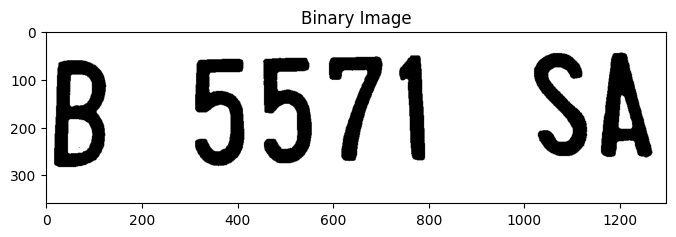

In [165]:
# Membuat citra biner
threshold = 0  # Sesuaikan ambang batas sesuai kebutuhan

binary_image = label_klaster.copy()  # Salin label klaster ke citra biner
binary_image[label_klaster != 0] = 0  # Setel semua label selain yang diinginkan menjadi 0 (hitam)
binary_image[label_klaster == 0] = 255  # Setel label yang diinginkan menjadi 255 (putih)

# Menampilkan citra biner
plt.figure(figsize=(8, 4))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

## **Image 4**

### **1. Load Citra ke-4**

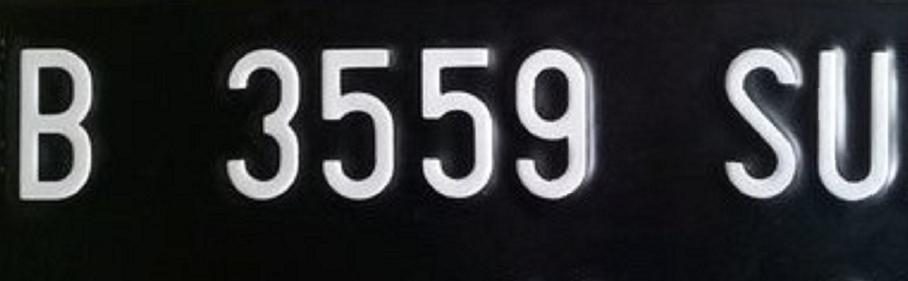

In [166]:
# Muat satu citra tertentu dan tampilkan dengan cv2_imshow
img4 = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/B3559SU.jpg')
cv2_imshow(img4)

### **2. Menampilkan Tinggi, Lebar, dan Jumlah Channel Citra**

In [167]:
# Dapatkan tinggi (h), lebar (w), dan jumlah channel (ch) citra
h, w, ch = img4.shape
print("Tinggi:", h)
print("Lebar:", w)
print("Channel:", ch)

Tinggi: 281
Lebar: 908
Channel: 3


### **3. Normalisasi Citra**

In [168]:
# Normalisasi data citra ke rentang 0-1
data = img4 / 255.0
# Reshape data citra ke bentuk 2D
data = data.reshape(h * w, ch)
data.shape

(255148, 3)

### **4. Plot Ruang Warna RGB**

In [169]:
# Fungsi untuk memplot piksel-piksel citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

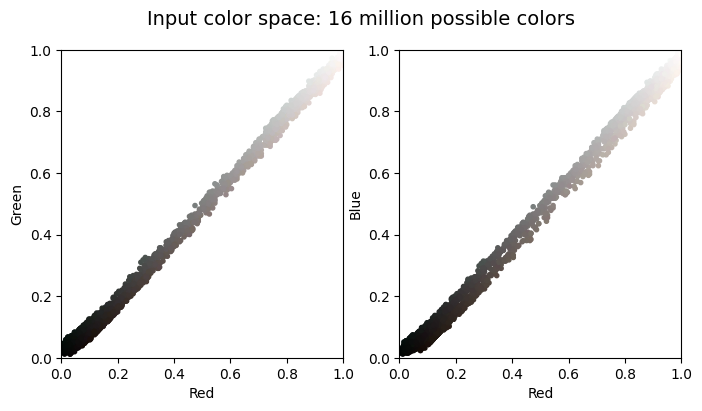

In [170]:
# Memplot distribusi piksel citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

### **5. Segmentasi Citra Menggunakan Algoritma K-Means**

In [171]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img4.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=jumlah_klaster)

# Fit model K-Means ke data citra yang sudah direshape
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img4.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img4.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **6. Hasil Segmentasi Citra**

Text(0.5, 1.0, '2-color Image')

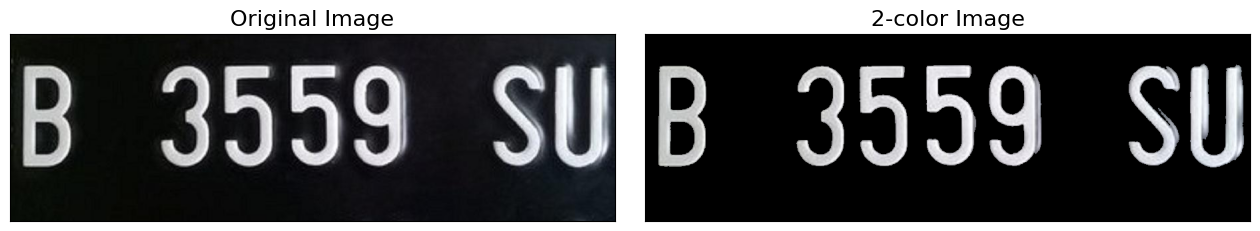

In [172]:
# Memplot citra asli dan citra hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

### **7. Konversi Label Klaster ke Citra Biner**

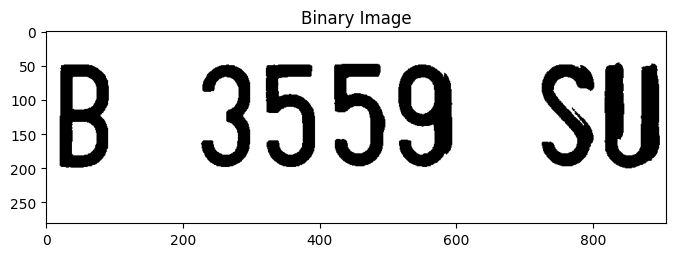

In [173]:
# Membuat citra biner
threshold = 0  # Sesuaikan ambang batas sesuai kebutuhan

binary_image = label_klaster.copy()  # Salin label klaster ke citra biner
binary_image[label_klaster != 0] = 0  # Setel semua label selain yang diinginkan menjadi 0 (hitam)
binary_image[label_klaster == 0] = 255  # Setel label yang diinginkan menjadi 255 (putih)

# Menampilkan citra biner
plt.figure(figsize=(8, 4))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

## **Image 5**

### **1. Load Citra ke-5**

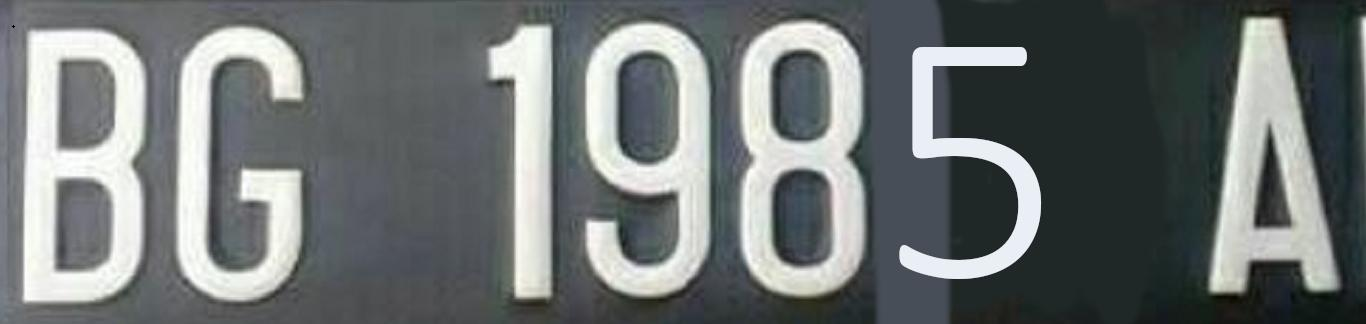

In [174]:
# Muat satu citra tertentu dan tampilkan dengan cv2_imshow
img5 = cv2.imread('/content/drive/MyDrive/MACHINE-LEARNING/BG1985A.jpg')
cv2_imshow(img5)

### **2. Menampilkan Tinggi, Lebar, dan Jumlah Channel Citra**

In [175]:
# Dapatkan tinggi (h), lebar (w), dan jumlah channel (ch) citra
h, w, ch = img5.shape
print("Tinggi:", h)
print("Lebar:", w)
print("Channel:", ch)

Tinggi: 324
Lebar: 1366
Channel: 3


### **3. Normalisasi Citra**

In [177]:
# Normalisasi data citra ke rentang 0-1
data = img5 / 255.0
# Reshape data citra ke bentuk 2D
data = data.reshape(h * w, ch)
data.shape

(442584, 3)

### **4. Plot Ruang Warna RGB**

In [178]:
# Fungsi untuk memplot piksel-piksel citra
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset acak dari data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

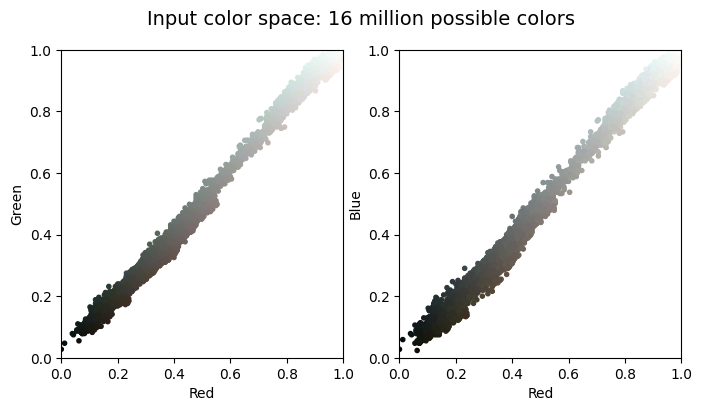

In [179]:
# Memplot distribusi piksel citra asli
plot_pixels(data, title='Input color space: 16 million possible colors')

### **5. Segmentasi Citra Menggunakan Algoritma K-Means**

In [180]:
from sklearn.cluster import KMeans

# Reshape citra menjadi array 2D (untuk K-Means)
citra_reshape = img5.reshape((-1, 3))

# Tentukan jumlah klaster yang diinginkan
jumlah_klaster = 2

# Inisialisasi model K-Means dengan jumlah klaster yang diinginkan
kmeans = KMeans(n_clusters=jumlah_klaster)

# Fit model K-Means ke data citra yang sudah direshape
kmeans.fit(citra_reshape)

# Arahkan label klaster kembali ke bentuk asli
label_klaster = kmeans.labels_.reshape(img5.shape[:2])

# Misalnya, Anda dapat menunjukkan klaster pertama (0) sebagai warna merah
citra_segmentasi = img5.copy()
citra_segmentasi[label_klaster == 0] = [0, 0, 0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **6. Hasil Segmentasi Citra**

Text(0.5, 1.0, '2-color Image')

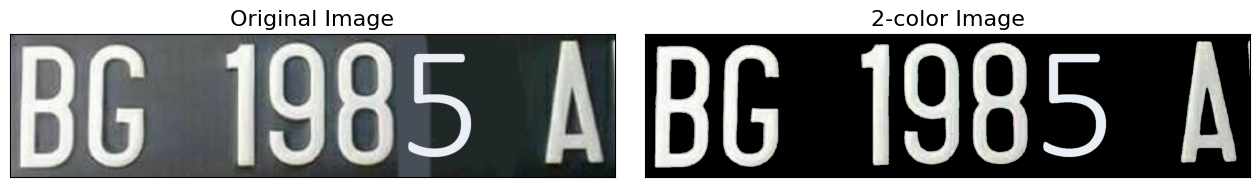

In [181]:
# Memplot citra asli dan citra hasil segmentasi
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image', size=16)
ax[1].imshow(cv2.cvtColor(citra_segmentasi, cv2.COLOR_BGR2RGB))
ax[1].set_title('2-color Image', size=16)

### **7. Konversi Label Klaster ke Citra Biner**

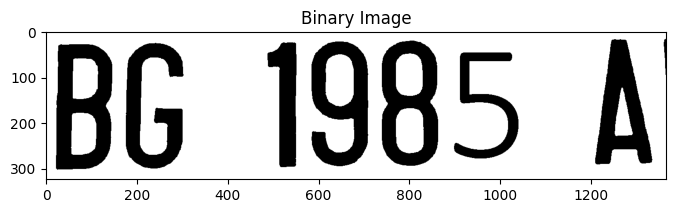

In [182]:
# Membuat citra biner
threshold = 0  # Sesuaikan ambang batas sesuai kebutuhan

binary_image = label_klaster.copy()  # Salin label klaster ke citra biner
binary_image[label_klaster != 0] = 0  # Setel semua label selain yang diinginkan menjadi 0 (hitam)
binary_image[label_klaster == 0] = 255  # Setel label yang diinginkan menjadi 255 (putih)

# Menampilkan citra biner
plt.figure(figsize=(8, 4))
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()